In [1]:
#라이브러리 임포트, 버전확인
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import sys
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
import numpy as np
np.random.seed(7)

print('Python version : ', sys.version)
print('TensorFlow version : ', tf.__version__)
print('Keras version : ', keras.__version__)

Using TensorFlow backend.


Python version :  3.7.6 (default, Jan  8 2020, 20:23:39) [MSC v.1916 64 bit (AMD64)]
TensorFlow version :  1.14.0
Keras version :  2.3.1


11493376/11490434 [==============================] - 11s 1us/step


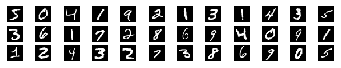

In [2]:
#데이터 이미지 출력코드
from keras.datasets import mnist

mnist = keras.datasets.mnist

(X_train0, y_train0), (X_test0, y_test0) = mnist.load_data()

import matplotlib.pylab as plt

plt.figure(figsize=(6,1))
for i in range(36):
    plt.subplot(3, 12, i+1)
    plt.imshow(X_train0[i], cmap="gray")
    plt.axis("off")
plt.show()

In [4]:
#학습데이터 준비코딩
img_rows = 28
img_cols = 28

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

input_shape = (img_rows, img_cols, 1)
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

batch_size = 128
num_classes = 10
epochs = 12

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [5]:
#케라스 제공 CNN 구조 학습
model = Sequential()
model.add(Conv2D(32, kernel_size=(5,5), strides=(1,1), padding='same',
                activation='relu',
                input_shape = input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1000, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes,activation='softmax'))
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1000)              6273000   
_________________________________________________________________
dropout_2 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)              

In [6]:
#모델학습
model.compile(loss ='categorical_crossentropy',
             optimizer = 'adam', metrics =['accuracy'])
hist = model.fit(x_train, y_train,
                batch_size = batch_size,
                epochs=epochs,
                verbose=1,
                validation_data = (x_test, y_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 81s 1ms/step - loss: 0.1791 - accuracy: 0.9458 - val_loss: 0.0574 - val_accuracy: 0.9810
Epoch 2/12
60000/60000 [==============================] - 85s 1ms/step - loss: 0.0622 - accuracy: 0.9809 - val_loss: 0.0440 - val_accuracy: 0.9854
Epoch 3/12
60000/60000 [==============================] - 81s 1ms/step - loss: 0.0453 - accuracy: 0.9855 - val_loss: 0.0362 - val_accuracy: 0.9877
Epoch 4/12
60000/60000 [==============================] - 81s 1ms/step - loss: 0.0360 - accuracy: 0.9885 - val_loss: 0.0288 - val_accuracy: 0.9898
Epoch 5/12
60000/60000 [==============================] - 83s 1ms/step - loss: 0.0289 - accuracy: 0.9909 - val_loss: 0.0319 - val_accuracy: 0.9892
Epoch 6/12
60000/60000 [==============================] - 82s 1ms/step - loss: 0.0242 - accuracy: 0.9920 - val_loss: 0.0331 - val_accuracy: 0.9897
Epoch 7/12
60000/60000 [==============================] - 81s 1ms/s

Test losss: 0.03298177564515952
Test accuracy: 0.9897000193595886


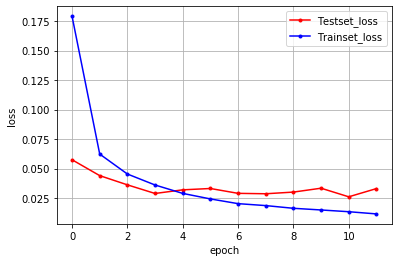

In [7]:
#손실값, 정확도 확인
score = model.evaluate(x_test, y_test, verbose = 0)
print('Test losss:', score[0])
print('Test accuracy:', score[1])

import numpy as np
#테스트, 학습 오차 그래프
y_vloss = hist.history['val_loss']
y_loss = hist.history['loss']
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c = "red", label = 'Testset_loss')
plt.plot(x_len, y_loss, marker='.', c = "blue", label = 'Trainset_loss')
plt.legend(loc ='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()


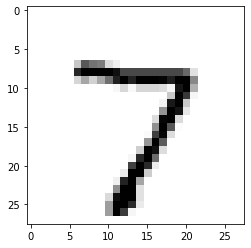

The Answer is  [7]


In [8]:
#예측결과 확인
n = 0
plt.imshow(x_test[n].reshape(28,28), cmap='Greys', interpolation='nearest')
plt.show()
print('The Answer is ', model.predict_classes(x_test[n].reshape((1,28,28,1))))